![logo](Data/ISJ.jpeg)

# MENTORED PROJECT of Masters II DATA Science

## Academic year 2022/2023

## Members:
- **DJEUNANG KENFACK Aude Michèle**
- **NZEUGANG NGOMSEU Romaric**

## Lecturer:
- **Dr. SIYOU Vanel**

# THEME

## Projet 5 : **Predict the selling price of a house**

# EXPLORATORY NOTEBOOK

In [1]:
# Open variables from text file
with open('Data/datafield.txt', 'r') as f:
    # Read the contents of the file
    contents = f.read()
    # Print the contents
    print(contents)

Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
Roof

In [2]:
# Open data description file to describe variables
with open('Data/data_description.txt', 'r') as f:
    # Read the contents of the file
    contents = f.read()
    # Print the contents
    print(contents)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

**We are trying to predict for how much money each house can be sold??**

**In this mainly we will look at data exploration and visulisation part**

**Exploratory Data Analysis is often most tedious and boring job.**

**But the more time you spend here on understanding, cleaning and preparing data the better fruits your predictive model will bare!!**

**Lets start.**

## Table of content

**1) INTRODUCTION**

- Import Libraries
- Load data
- Variable Identification
- Run Statistical summaries
- Listing unique values in categorical columns

**2) CORRELATION**

**3) MISSING VALUES INPUTATION**

- Figure out missing value columns
- Handle out missing values
    - Categorical
    - Numerical
- Describing Categorical and Numerical features separately after handling the missing values from our data
    
**4) HANDLING OUTLIERS**
- Check for Outliers
- Replacing outliers

**5) VISUALIZATION**

- Univariate Analysis
- Bivariate Analysis

**6) EXPORTING DATASET**

# I - INTRODUCTION

## a) Import libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
from tqdm import tqdm

## b) Load Data

In [4]:
houses = pd.read_csv("Data/train.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
# (rows,columns)
houses.shape

(1460, 81)

## c) Variable Identification

In [6]:
# Info method provides information about dataset like 
# Total values in each column, null/not null, datatype, memory occupied etc
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
houses['GarageYrBlt'] = houses['GarageYrBlt'].astype('category')

In [8]:
# From our data_description file we observed that the following variable types were taken as numerical meanwhile they are categorical variables
int_obj = ['YrSold','MoSold','YearBuilt','YearRemodAdd','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','GarageYrBlt','MSSubClass']

In [9]:
# Change int & float to object types
for val in int_obj:
    houses[val] = houses[val].astype('object')
print(houses.dtypes)

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


As we can see in the above cell we have 81 variables with 43 categorical and 38 numerical ( 3 floats and 35 intergers)

In [10]:
# How many columns with different datatypes are there?
houses_dtypes = houses.dtypes.value_counts()
houses_dtypes

object     53
int64      26
float64     2
dtype: int64

## d) Statistical Summaries

In [11]:
# Describe gives statistical information about numerical columns in the dataset
houses.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [12]:
# Descriptive statistics summary for the target only
houses['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Very well... It seems that your minimum price is larger than zero. Excellent!

C:\Program Files\KMSpico\temp\ipykernel_16552\3602109729.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houses['SalePrice']);


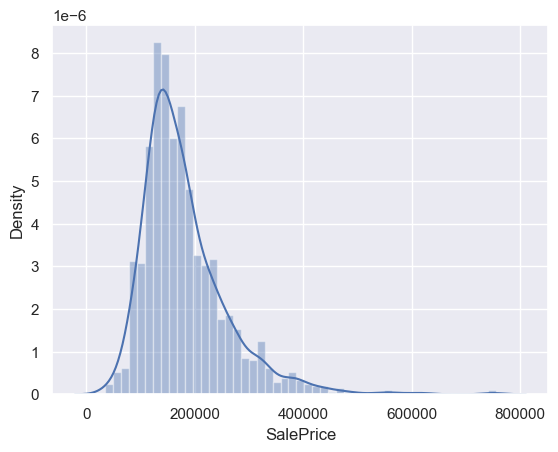

In [13]:
# Histogram to show the distribution on the sale price
sns.distplot(houses['SalePrice']);

Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness.

In [14]:
# Skewness and Kurtosis
print("Skewness: %f" % houses['SalePrice'].skew())
print("Kurtosis: %f" % houses['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## e) Listing unique values in categorical columns

In [15]:
def printUniqueValues(df,cardinality=1000):
    n = df.select_dtypes(include=object)
    for column in n.columns:
        uCount = df[column].nunique()
        if uCount<=cardinality:
            print('{:>12}: {} {}'.format(column,uCount, df[column].unique()))
            #print(column,': [',uCount , '] ', df[column].unique())


printUniqueValues(houses,20)

  MSSubClass: 15 [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
    MSZoning: 5 ['RL' 'RM' 'C (all)' 'FV' 'RH']
      Street: 2 ['Pave' 'Grvl']
       Alley: 2 [nan 'Grvl' 'Pave']
    LotShape: 4 ['Reg' 'IR1' 'IR2' 'IR3']
 LandContour: 4 ['Lvl' 'Bnk' 'Low' 'HLS']
   Utilities: 2 ['AllPub' 'NoSeWa']
   LotConfig: 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
   LandSlope: 3 ['Gtl' 'Mod' 'Sev']
  Condition1: 9 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
  Condition2: 8 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
    BldgType: 5 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
  HouseStyle: 8 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
 OverallQual: 10 [7 6 8 5 9 4 10 3 1 2]
 OverallCond: 9 [5 8 6 7 4 2 3 9 1]
   RoofStyle: 6 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
    RoofMatl: 8 ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
 Exterior1st: 15 ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard'

# II - CORRELATION

In [16]:
# Correlation
corr = houses.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

OverallQual ,GrLivArea ,GarageCars,GarageArea ,TotalBsmtSF, 1stFlrSF ,FullBath,TotRmsAbvGrd have more than 0.5 correlation with SalePrice.

- EnclosedPorch and KitchenAbvGr have little negative correlation with target variable.

- These can prove to be important features to predict SalePrice.

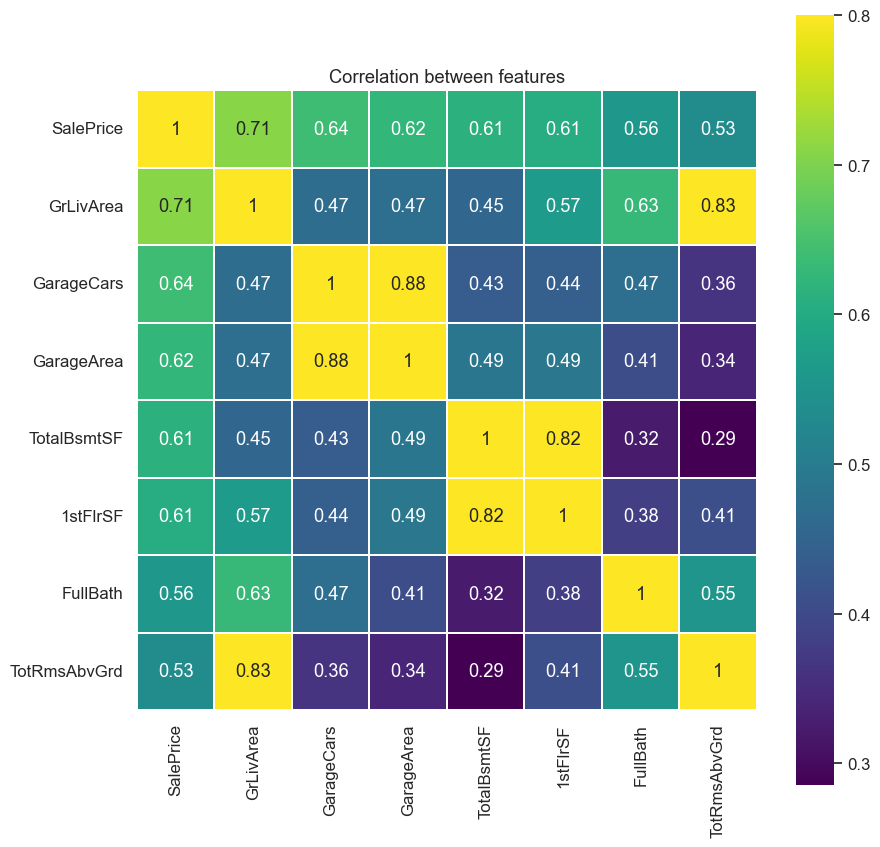

In [17]:
# Let's see that closely with the heatmap
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

corrMatrix=houses[["SalePrice","GrLivArea","GarageCars",
                  "GarageArea","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

As we saw above there are few feature which shows high multicollinearity from heatmap. Lets focus on yellow squares on diagonal line and few on the sides.

- SalePrice and OverallQual

- GarageArea and GarageCars

- TotalBsmtSF and 1stFlrSF

- GrLiveArea and TotRmsAbvGrd

- YearBulit and GarageYrBlt

We have to create a single feature from them before we use them as predictors.

**Pivotal Features**

In [18]:
houses[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [19]:
houses[['GarageCars','SalePrice']].groupby(['GarageCars'],
as_index=False).mean().sort_values(by='GarageCars', ascending=False)

,GarageCars,SalePrice
4,4,192655.800000
3,3,309636.121547
2,2,183851.663835
1,1,128116.688347
0,0,103317.283951


In [20]:
houses[['Fireplaces','SalePrice']].groupby(['Fireplaces'],
as_index=False).mean().sort_values(by='Fireplaces', ascending=False)

,Fireplaces,SalePrice
3,3,252000.000000
2,2,240588.539130
1,1,211843.909231
0,0,141331.482609


# III - MISSING VALUES INPUTATION

**What's missing? to what extent?**

Missing Value Imputation

Missing values in the training data set can affect prediction or classification of a model negatively.

Also some machine learning algorithms can't accept missing data eg. SVM.

But filling missing values with mean/median/mode or using another predictive model to predict missing values is also a prediction which may not be 100% accurate, instead you can use models like Decision Trees and Random Forest which handle missing values very well.

Some of this part is based on this kernel: https://www.kaggle.com/bisaria/house-prices-advanced-regression-techniques/handling-missing-data

## a) Figure out missing value columns

In [21]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
                
        # Coumn for dtypes
        dtype = df.dtypes
    
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,dtype], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2:'Data Types'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

house = missing_values_table(houses)
house.T

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values,Data Types
PoolQC,1453,99.5,object
MiscFeature,1406,96.3,object
Alley,1369,93.8,object
Fence,1179,80.8,object
FireplaceQu,690,47.3,object
LotFrontage,259,17.7,float64
GarageType,81,5.5,object
GarageYrBlt,81,5.5,object
GarageFinish,81,5.5,object
GarageQual,81,5.5,object


We see here in column PoolQC 99.5 % values are missing, Not enough data to take insight from him

MiscFeature, Alley this column also lot of missing values

So, we can decide 80 threshold to delete columns

if column have more than 80% data missing we simply drop those columns

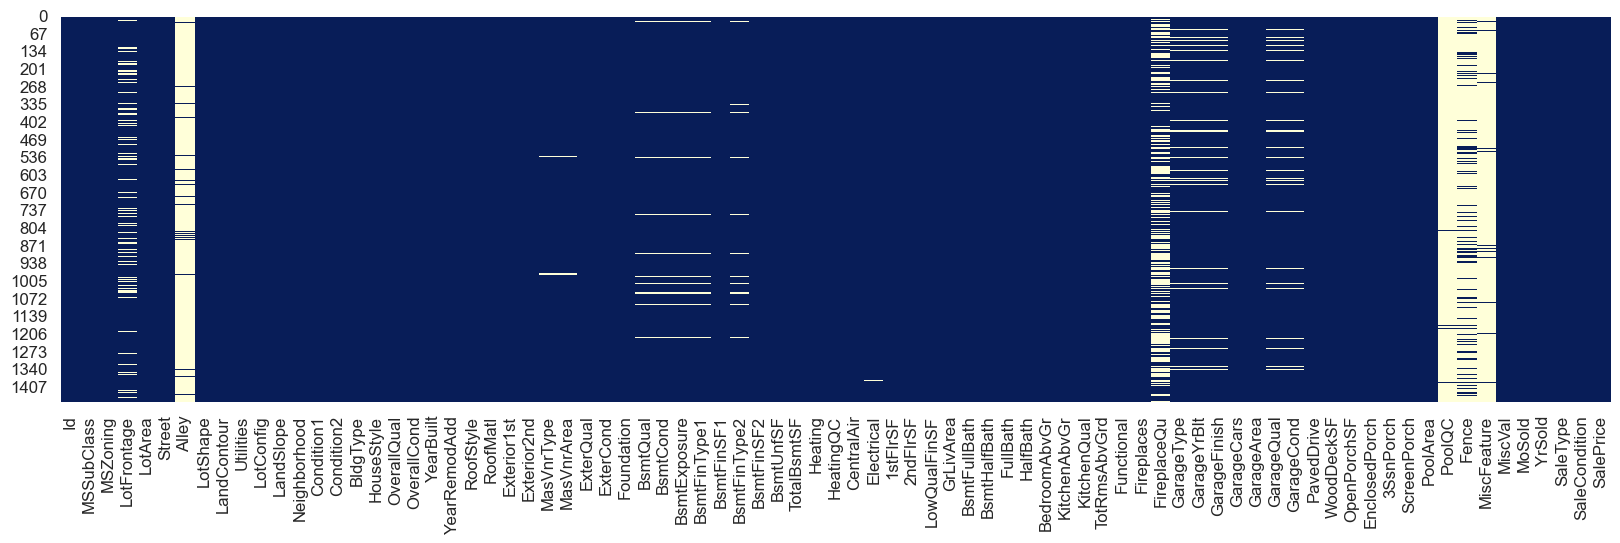

In [22]:
# Visualising in a plot
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(houses.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

## b) Handle out missing values

In [23]:
threshold = 80
drop_cols = house[house['% of Total Values'] > threshold].index.tolist()
drop_cols

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [24]:
houses = houses.drop(columns=drop_cols)
houses.shape

(1460, 77)

**Advantage**
- Less number of features implies the model training faster

**Disadvantage**
- We might loose some information

In [25]:
house = missing_values_table(houses)
house

Your selected dataframe has 77 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values,Data Types
FireplaceQu,690,47.3,object
LotFrontage,259,17.7,float64
GarageType,81,5.5,object
GarageYrBlt,81,5.5,object
GarageFinish,81,5.5,object
GarageQual,81,5.5,object
GarageCond,81,5.5,object
BsmtExposure,38,2.6,object
BsmtFinType2,38,2.6,object
BsmtQual,37,2.5,object


### b - i) Categorical

In [26]:
# Handling categorical variables
def freq_imp(df,variable):
    frq_cat = df[variable].mode()[0]
    df[variable].fillna(frq_cat, inplace=True)

In [27]:
# Puting all cat variables with missing vals in a list
cat_columns = house[house['Data Types'] == 'object'].index.tolist()
cat_columns

['FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrType',
 'Electrical']

In [28]:
for col in cat_columns:
    freq_imp(houses,col)

missing_values_table(houses)

Your selected dataframe has 77 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,Data Types
LotFrontage,259,17.7,float64
MasVnrArea,8,0.5,float64


Now no NaN values for any categorical feature

**Advantages**
- Fater way to implement

**Disadvantages**
- Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's it distorts the relation of the most frequent label

### b - ii) Numerical

In [29]:
# Handling Numerical variables
def freq_imp(df,variable):
    frq_num = df[variable].median()
    df[variable].fillna(frq_num, inplace=True)

In [30]:
num_columns = house[house['Data Types'] == 'float64'].index.tolist()
num_columns

['LotFrontage', 'MasVnrArea']

In [31]:
for col in num_columns:
    freq_imp(houses,col)

missing_values_table(houses)

Your selected dataframe has 77 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Data Types


No more missing values in our dataset so we can proceed without any trouble to implementing our models with this data so we are going to export this dataframe into a csv to use in our models Notebook

In [32]:
def printUniqueValues(df,cardinality=1000):
    n = df.select_dtypes(include=object)
    for column in n.columns:
        uCount = df[column].nunique()
        if uCount<=cardinality:
            print('{:>12}: {} {}'.format(column,uCount, df[column].unique()))
            #print(column,': [',uCount , '] ', df[column].unique())


printUniqueValues(houses,20)

  MSSubClass: 15 [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
    MSZoning: 5 ['RL' 'RM' 'C (all)' 'FV' 'RH']
      Street: 2 ['Pave' 'Grvl']
    LotShape: 4 ['Reg' 'IR1' 'IR2' 'IR3']
 LandContour: 4 ['Lvl' 'Bnk' 'Low' 'HLS']
   Utilities: 2 ['AllPub' 'NoSeWa']
   LotConfig: 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
   LandSlope: 3 ['Gtl' 'Mod' 'Sev']
  Condition1: 9 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
  Condition2: 8 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
    BldgType: 5 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
  HouseStyle: 8 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
 OverallQual: 10 [7 6 8 5 9 4 10 3 1 2]
 OverallCond: 9 [5 8 6 7 4 2 3 9 1]
   RoofStyle: 6 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
    RoofMatl: 8 ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
 Exterior1st: 15 ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Ply


### c) Describing Categorical and Numerical features separately after handling the missing values from our data

In [33]:
num_features = houses.select_dtypes(include=['int64','float64'])
num_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0


In [34]:
categorical_features = houses.select_dtypes(include='object')
categorical_features.describe().T

,count,unique,top,freq
MSSubClass,1460,15,20,536
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


# IV - HANDLING OUTLIERS

### a) Check for Outliers

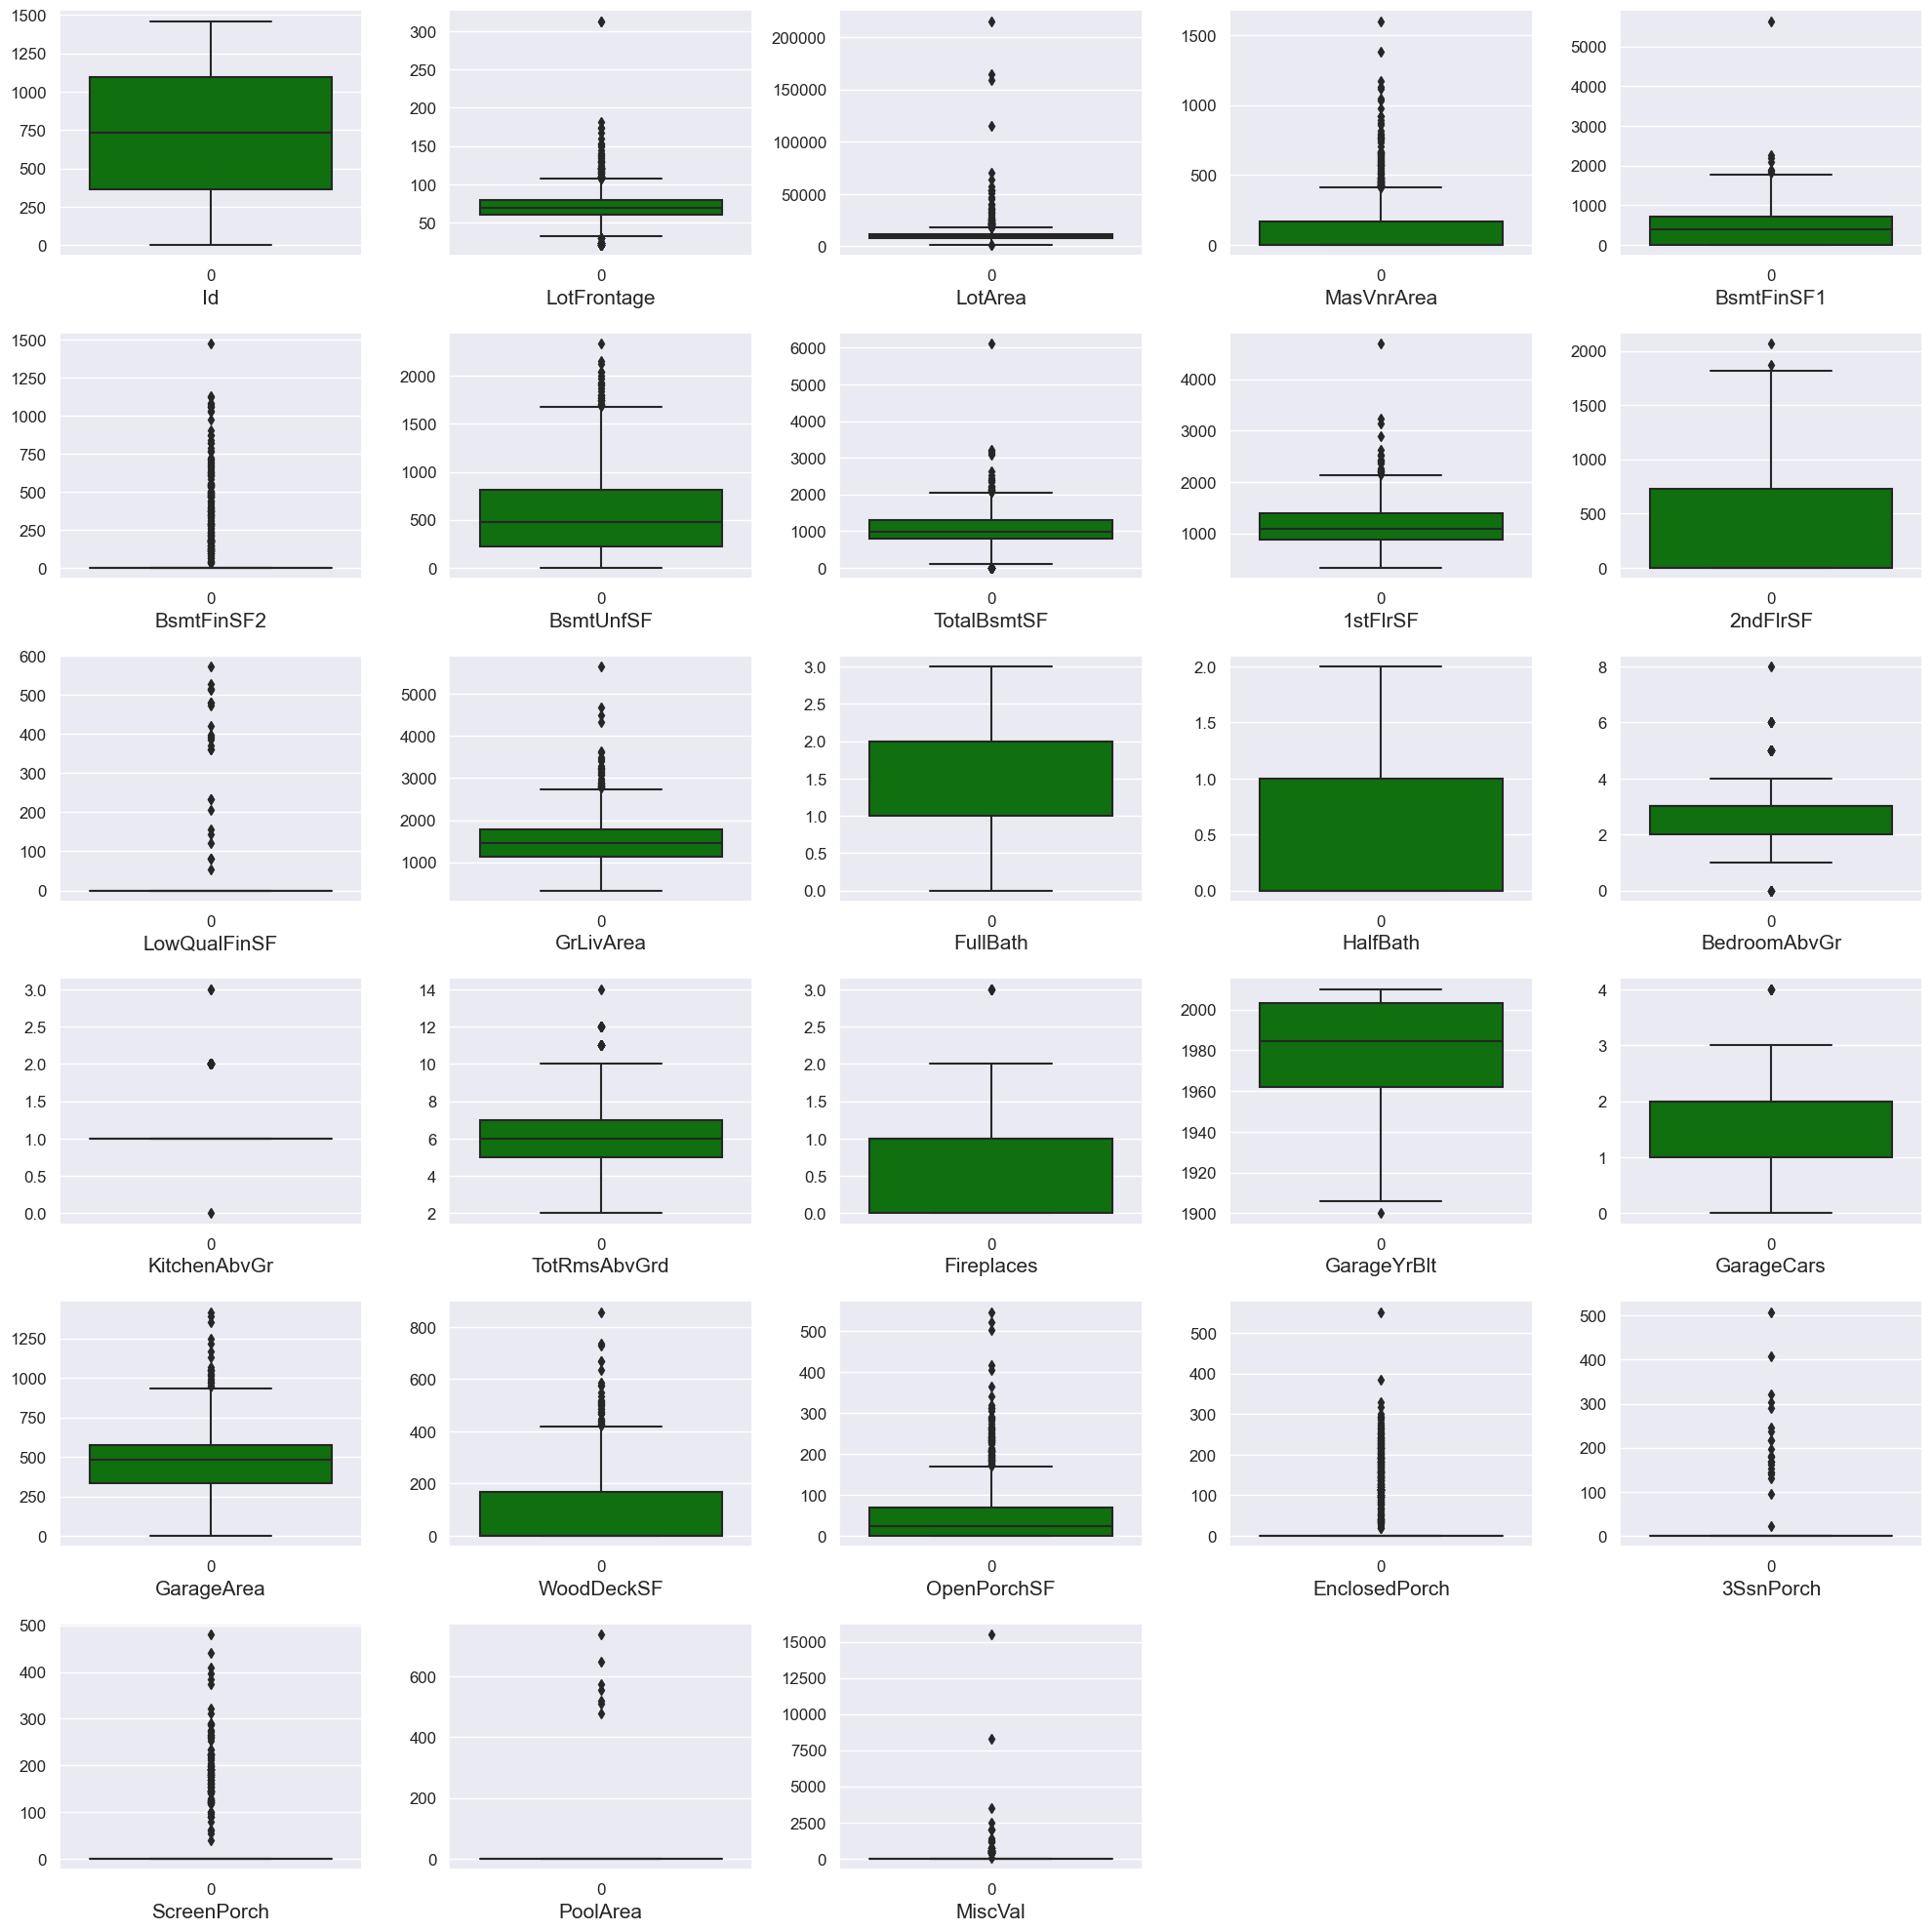

In [35]:
plt.figure(figsize = (20, 20))
plotnumber = 1

for col in num_features:
    if plotnumber <= 28:
        ax = plt.subplot(6, 5, plotnumber)
        sns.boxplot(houses[col], color='green')
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

# V - VISUALIZATION

MSZoning

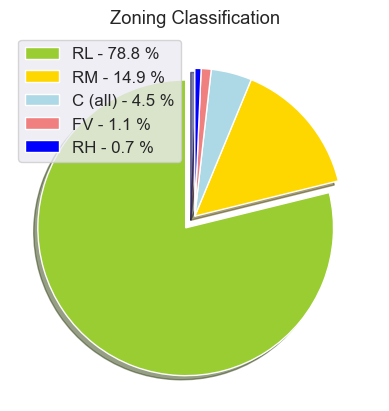

Text(0, 0.5, 'Sale Price')

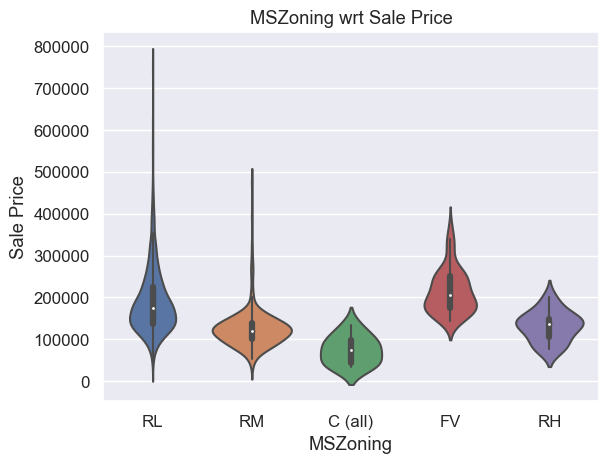

In [36]:
labels = houses["MSZoning"].unique()
sizes = houses["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()

sns.violinplot(x=houses.MSZoning,y=houses["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price")

**1st Floor in square feet**

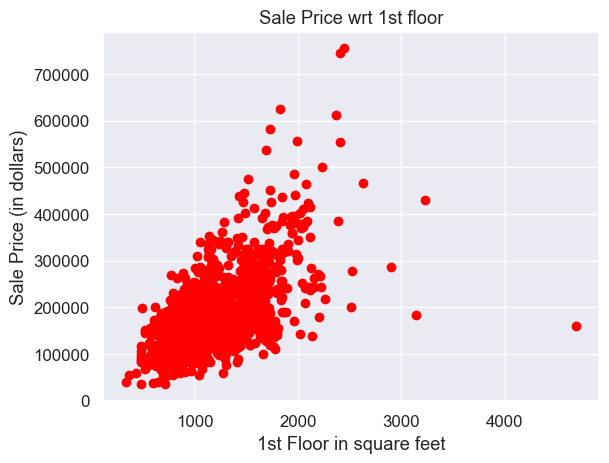

In [37]:
plt.scatter(houses["1stFlrSF"],houses.SalePrice, color='red')
plt.title("Sale Price wrt 1st floor")
plt.ylabel('Sale Price (in dollars)')
plt.xlabel("1st Floor in square feet");

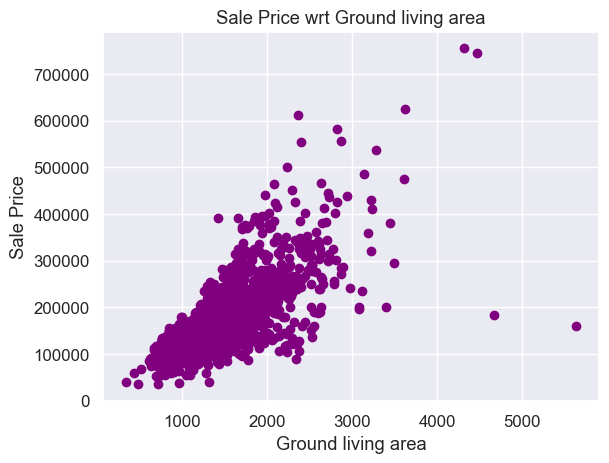

In [38]:
plt.scatter( houses["GrLivArea"],houses["SalePrice"],color='purple')
plt.title("Sale Price wrt Ground living area")
plt.ylabel('Sale Price')
plt.xlabel("Ground living area");

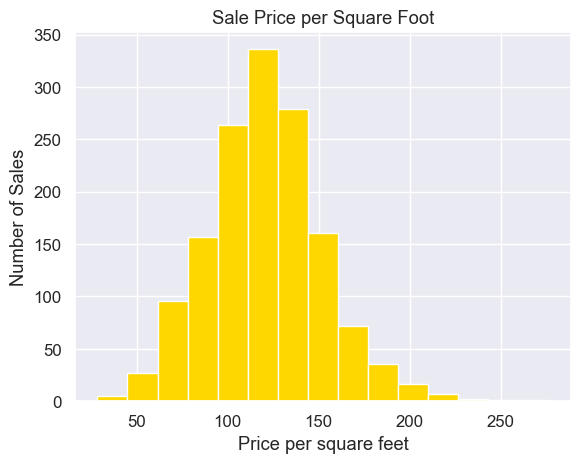

In [39]:
houses['SalePriceSF'] = houses['SalePrice']/houses['GrLivArea']
plt.hist(houses['SalePriceSF'], bins=15,color="gold")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

**Ground Living Area w.r.t SalePrice**

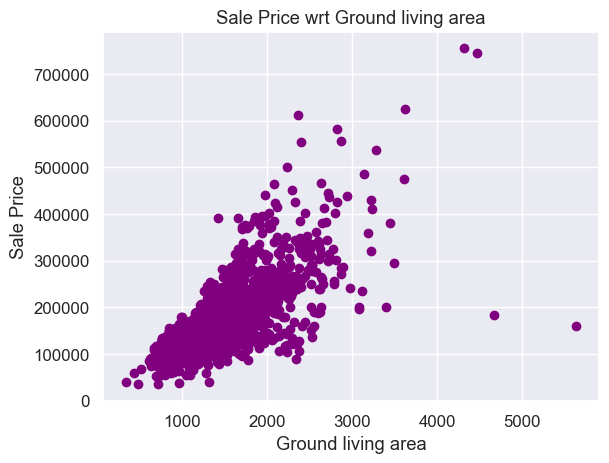

In [40]:
plt.scatter( houses["GrLivArea"],houses["SalePrice"],color='purple')
plt.title("Sale Price wrt Ground living area")
plt.ylabel('Sale Price')
plt.xlabel("Ground living area");

**SalePrice per square foot**

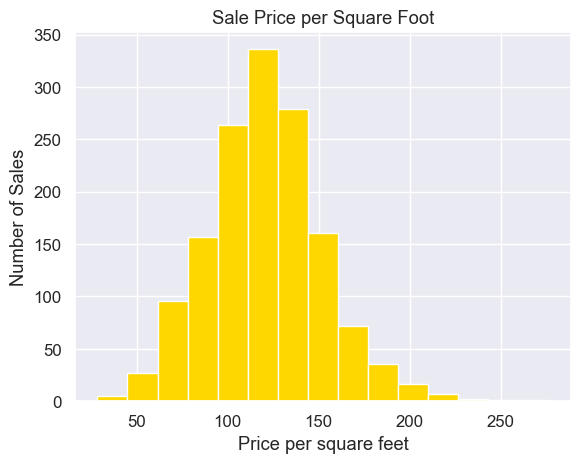

In [41]:
houses['SalePriceSF'] = houses['SalePrice']/houses['GrLivArea']
plt.hist(houses['SalePriceSF'], bins=15,color="gold")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

In [42]:
#Average Sale Price per square feet 

print("$",houses.SalePriceSF.mean())

$ 120.57287807326857


**Garage Area**

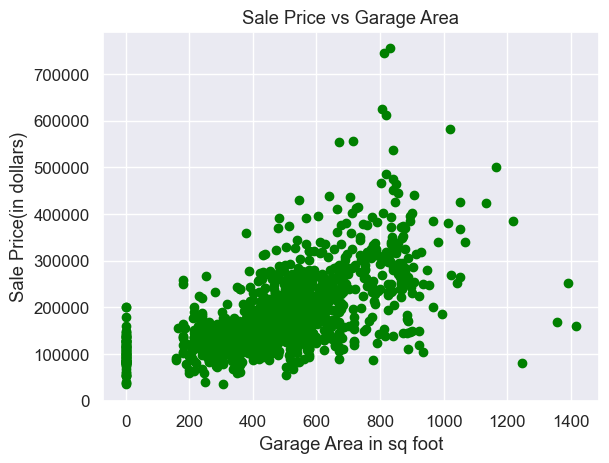

In [43]:
plt.scatter(houses["GarageArea"],houses.SalePrice, color='green')
plt.title("Sale Price vs Garage Area")
plt.ylabel('Sale Price(in dollars)')
plt.xlabel("Garage Area in sq foot");

**Building , remodelling years and age of house**

C:\Program Files\KMSpico\temp\ipykernel_16552\2005640974.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houses["YearBuilt"],color='seagreen', kde=False);


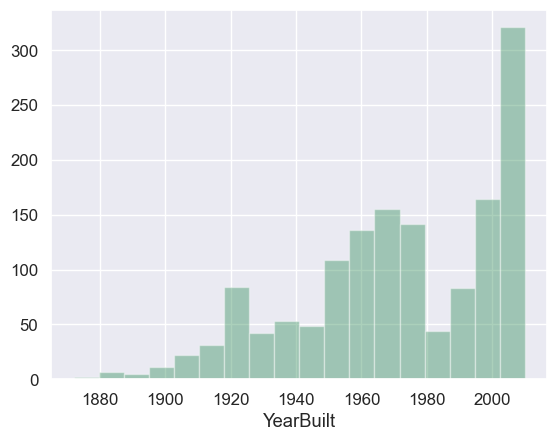

In [44]:
sns.distplot(houses["YearBuilt"],color='seagreen', kde=False);

C:\Program Files\KMSpico\temp\ipykernel_16552\4138829418.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houses["YearRemodAdd"].astype(int),color='r', kde=False);


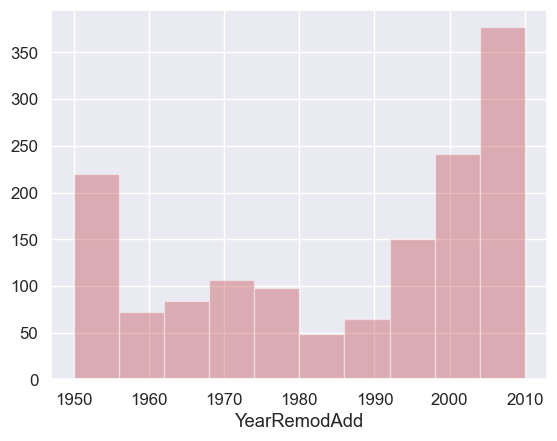

In [45]:
sns.distplot(houses["YearRemodAdd"].astype(int),color='r', kde=False);

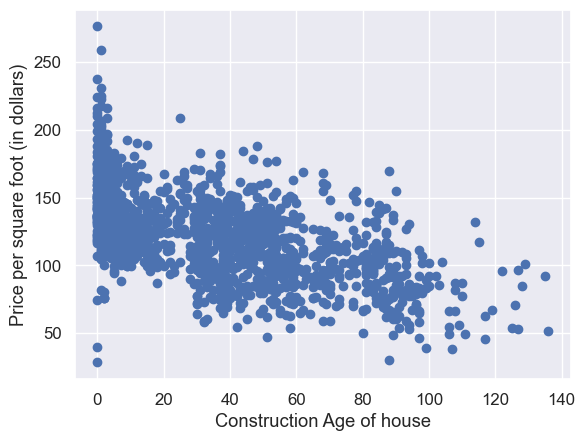

In [46]:
houses['ConstructionAge'] = houses['YrSold'] - houses['YearBuilt']
plt.scatter(houses['ConstructionAge'], houses['SalePriceSF'])
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");


**Price of house goes down with its age.**

**Heating and AC arrangements**

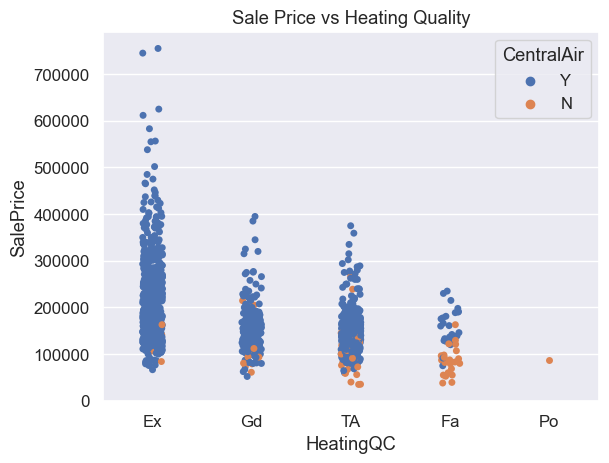

In [47]:
sns.stripplot(x="HeatingQC", y="SalePrice",data=houses,hue='CentralAir',jitter=True)
plt.title("Sale Price vs Heating Quality");

**Having AC definitely escalates price of house.**

**Bathrooms in house**

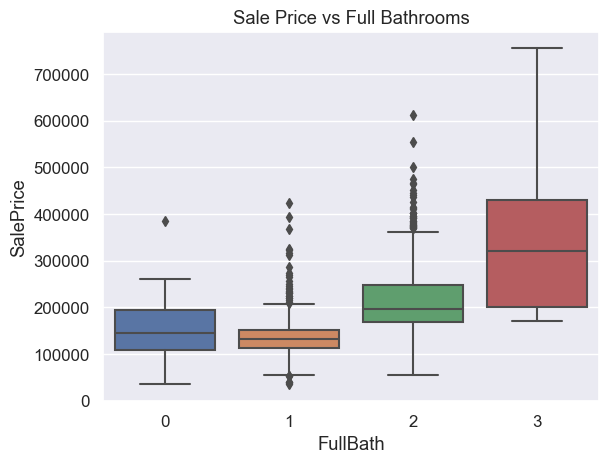

In [48]:
sns.boxplot(x=houses["FullBath"],y=houses["SalePrice"])
plt.title("Sale Price vs Full Bathrooms")

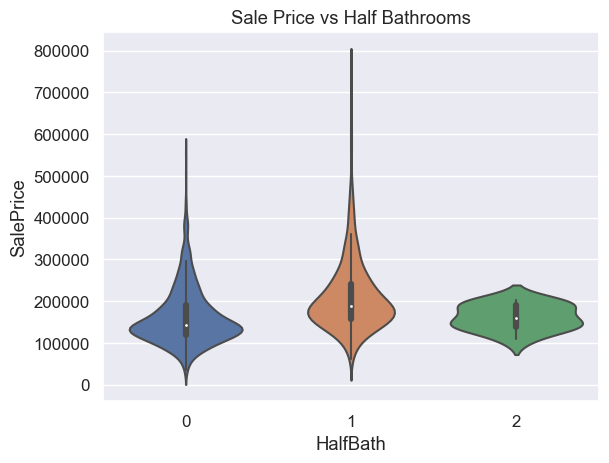

In [49]:
sns.violinplot(x=houses["HalfBath"],y=houses["SalePrice"])
plt.title("Sale Price vs Half Bathrooms");

**Total rooms above grade**

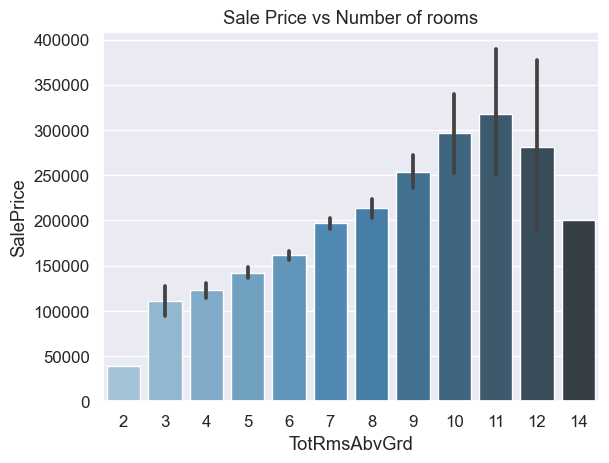

In [50]:
sns.barplot(x=houses["TotRmsAbvGrd"],y=houses["SalePrice"],palette="Blues_d")
plt.title("Sale Price vs Number of rooms");

**Kitchen Quality**

**Neighbourhood**

Text(0.5, 1.0, 'Sale Price vs Neighborhood')

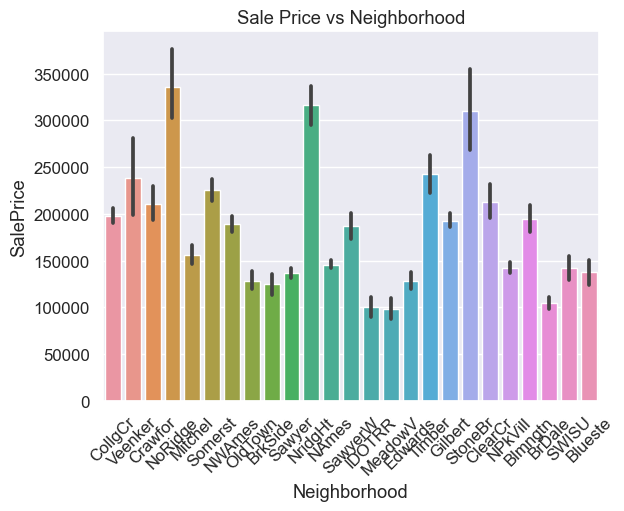

In [51]:
plt.xticks(rotation=45) 
sns.barplot(x=houses["Neighborhood"],y=houses["SalePrice"])
plt.title("Sale Price vs Neighborhood")

**Overall Quality**

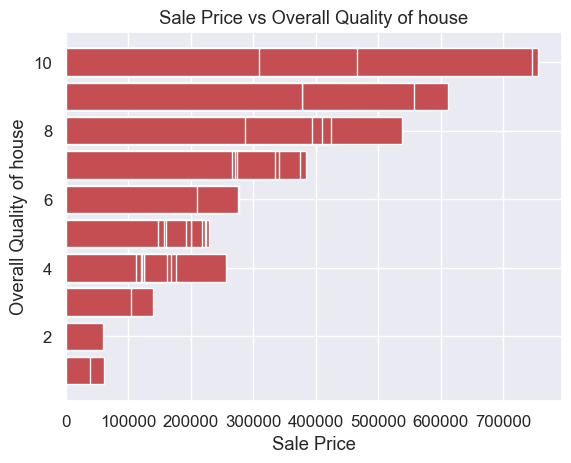

In [52]:
plt.barh(houses["OverallQual"],width=houses["SalePrice"],color="r")
plt.title("Sale Price vs Overall Quality of house")
plt.ylabel("Overall Quality of house")
plt.xlabel("Sale Price");

**2nd Floor with SalePrice**

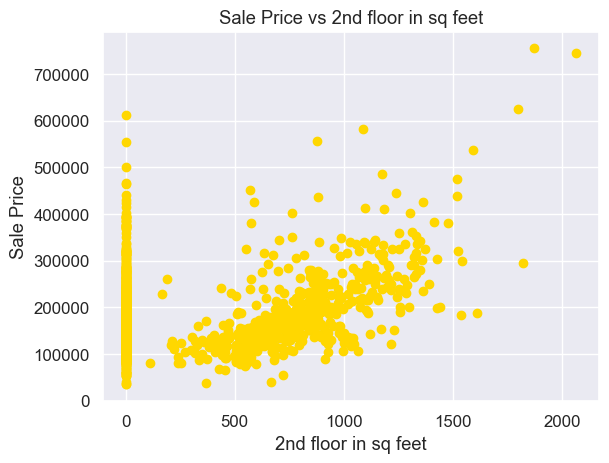

In [53]:
plt.scatter(houses["2ndFlrSF"],houses["SalePrice"],color="gold")
plt.title("Sale Price vs 2nd floor in sq feet");
plt.xlabel("2nd floor in sq feet")
plt.ylabel("Sale Price");

**Street**

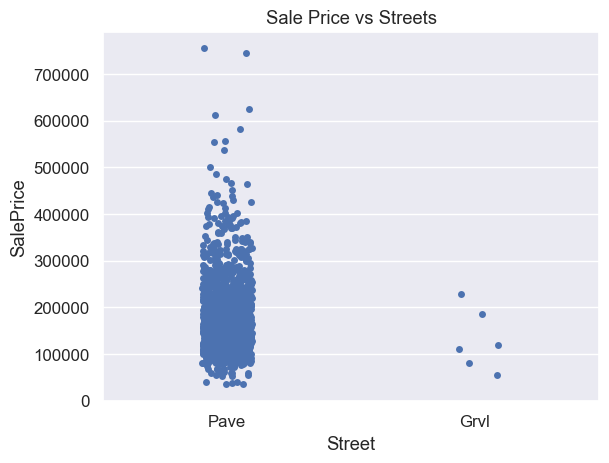

In [54]:
#most streets are paved lets visulalize it
sns.stripplot(x=houses["Street"], y=houses["SalePrice"],jitter=True)
plt.title("Sale Price vs Streets");

**Let us examine numerical features in the train dataset**

In [55]:
numeric_features = houses.select_dtypes(include=[np.number])

numeric_features.columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'SalePriceSF'],
      dtype='object')

**Let us examine categorical features in the train dataset**

In [56]:
categorical_features = houses.select_dtypes(include=[np.object])

categorical_features.columns

C:\Program Files\KMSpico\temp\ipykernel_16552\2103192740.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = houses.select_dtypes(include=[np.object])


Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'ConstructionAge'],
      dtype='object')

# EXPORTING DATAFRAME TO CSV

In [57]:
# Export the dataframe to a CSV file
houses.to_csv('clean_train.csv', index=False)

## END